# カーネル法

### 重回帰分析の式
$$
{\hat{y} = f({\bf x}) = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n 
}
$$
マルチレイヤーパーセプトロンに似ている式 <br>w_0はバイアスと等価
### 正規方程式
$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
微分した結果、２乗が展開されたような式になる

$$
\begin{eqnarray} 
\frac{\partial}{\partial \theta_j}J(\theta) &=& \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} \\ 
&=& \frac{1}{m}\{\sum_{k}\theta_k\sum_{i}x_j^{(i)}x_k^{(i)} - \sum_{i}x_j^{(i)}y^{(i)}\} 
\end{eqnarray}
$$

hθ(x)は、xという入力にθという重みをかけたものになる。Σkがポイント。

$$
m\left[\begin{array}{cc} 
\frac{\partial}{\partial \theta_0}J(\theta)\\ 
\frac{\partial}{\partial \theta_1}J(\theta)\\ 
\vdots\\ 
\frac{\partial}{\partial \theta_n}J(\theta) 
\end{array}\right] = 
X^TX \theta - X^Ty
$$
正規方程式の証明終了
$$
\begin{eqnarray} 
X^TX \theta &=& X^Ty\\ 
\theta &=& (X^TX)^{-1} X^Ty 
\end{eqnarray}
$$
両辺に、左辺のΘの係数の逆行列を掛け算する

$$
{f({\bf x}) = \sum_{i=0}^{n} w_i x_i
}
$$

$$
{f({\bf x}) = \sum_{i=1}^{N} \alpha_i k({\bf x}^{(i)}, {\bf x})
}
$$

## ガウスカーネル 
$$
{k({\bf x}, {\bf x}') = exp(-\beta \|{\bf x} - {\bf x}'\|^2)
}
$$
expはeのx乗　つまり、2.71...のx乗 xは(  )の中身<br>βはβ>0のハイパーパラメータであり、任意の変数

$$
\|{\bf x} - {\bf x}'\|=\sqrt{\sum_{j=1}^n (x_j - x'_j)^2}
$$
$$\|{\bf x} - {\bf x}'\|はl2ノルムを表している。$$

$$
k(x,x')=exp(-\beta(x-x')^2)
$$

In [1]:
!pip --proxy=wwwproxy.kanazawa-it.ac.jp:8080 install seaborn

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


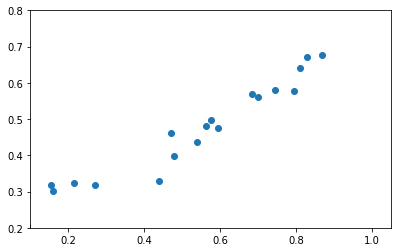

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 線形回帰モデル用データセット
# a : slope of a line
# b : intercept of a line
# size : number of data
# xlim : domain of variable x
# scale : standard deviation
def linear_dataset(a, b, size, xlim=[0, 1], scale=None):
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = a * x + b
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

# データを生成
data = linear_dataset(0.5, 0.2, 20, scale=0.03)

# データを描画
plt.figure(figsize=(6.472, 4))
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
plt.xlim((0.1, 1.05))
plt.ylim((0.2, 0.8))
plt.show()

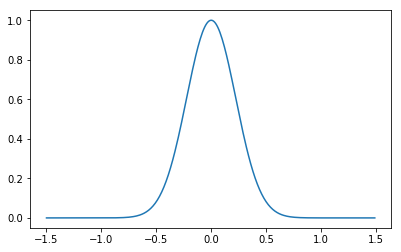

In [3]:
def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.01)
Y = np.zeros(len(X))
for i in range(len(X)):
    Y[i] = kernel(X[i], 0, 10)

plt.figure(figsize=(6.472, 4))
plt.plot(X, Y)
plt.show()

-1.5
1.6918979226151304e-10


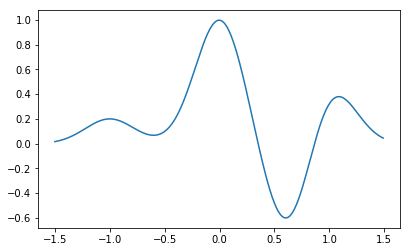

In [13]:
def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))#np.sumを外しても動作します。

def kernel_test(xi, xj, beta=1):
    print((xi - xj))
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.01)
Y = np.zeros(len(X))

centers = [-1, 0, 0.5, 0.6, 1]
weights = [0.2, 1, 0.3, -1, 0.5]
#########################################
#kernel関数で、np.sumがどのような挙動を示しているかテスト
print(kernel_test(X[0],centers[1],10))
#########################################

#X:-1.5~1.5 
for i in range(len(X)):
    for weight, center in zip(weights, centers):
        Y[i] += weight * kernel(X[i], center, 10)

plt.figure(figsize=(6.472, 4))
plt.plot(X, Y)
plt.show()

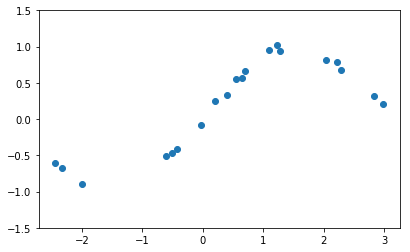

In [5]:
# カーネル回帰モデル用データセット
# size : number of data
# xlim : domain of variable x
# scale : standard deviation
def wave_dataset(size, xlim=[0, 1], scale=None):
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

# データを生成
data = wave_dataset(20, xlim=[-3.14, 3.14], scale=0.05)

# データを描画
plt.figure(figsize=(6.472, 4))
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
plt.ylim((-1.5, 1.5))
plt.show()

In [6]:
from itertools import combinations_with_replacement

#もう一度kernel関数を紹介
#def kernel(xi, xj, beta=1):
#    return np.exp(- beta * np.sum((xi - xj)**2))

X = data['x'].as_matrix()
Y = data['y'].as_matrix()

#TEST Xの可視化
print(X)

# ハイパーパラメータ
beta = 1

# データ数
N = X.shape[0]

#TEST ２つの数字の組み合わせを求める　九九の表のようなもの
for i, j in combinations_with_replacement(range(N), 2):
    print("i:"+str(i)+"| j:"+str(j))
# グラム行列の計算
K = np.zeros((N, N))
for i, j in combinations_with_replacement(range(N), 2):
    K[i][j] = kernel(X[i], X[j])
    K[j][i] = K[i][j]


[ 2.97545323  0.55205916  0.39339059  1.21833953  0.63898912  2.83212807
  2.20957687  0.70218819 -0.0318965  -0.50598084  2.28338585  1.09007326
 -1.9939968  -2.32735348  0.19697489 -2.43727143  1.28229727  2.02736905
 -0.60695192 -0.43282333]
i:0| j:0
i:0| j:1
i:0| j:2
i:0| j:3
i:0| j:4
i:0| j:5
i:0| j:6
i:0| j:7
i:0| j:8
i:0| j:9
i:0| j:10
i:0| j:11
i:0| j:12
i:0| j:13
i:0| j:14
i:0| j:15
i:0| j:16
i:0| j:17
i:0| j:18
i:0| j:19
i:1| j:1
i:1| j:2
i:1| j:3
i:1| j:4
i:1| j:5
i:1| j:6
i:1| j:7
i:1| j:8
i:1| j:9
i:1| j:10
i:1| j:11
i:1| j:12
i:1| j:13
i:1| j:14
i:1| j:15
i:1| j:16
i:1| j:17
i:1| j:18
i:1| j:19
i:2| j:2
i:2| j:3
i:2| j:4
i:2| j:5
i:2| j:6
i:2| j:7
i:2| j:8
i:2| j:9
i:2| j:10
i:2| j:11
i:2| j:12
i:2| j:13
i:2| j:14
i:2| j:15
i:2| j:16
i:2| j:17
i:2| j:18
i:2| j:19
i:3| j:3
i:3| j:4
i:3| j:5
i:3| j:6
i:3| j:7
i:3| j:8
i:3| j:9
i:3| j:10
i:3| j:11
i:3| j:12
i:3| j:13
i:3| j:14
i:3| j:15
i:3| j:16
i:3| j:17
i:3| j:18
i:3| j:19
i:4| j:4
i:4| j:5
i:4| j:6
i:4| j:7
i:4| j:8
i:4|

- Kはグラム行列と呼ばれる。
$$
{\hat{y} =
\left(\begin{matrix}
k({\bf x}^{(1)}, {\bf x}) & k({\bf x}^{(2)}, {\bf x}) & \cdots & k({\bf x}^{(N)}, {\bf x})
\end{matrix}\right)
\left(\begin{matrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_N
\end{matrix}\right)
}
$$

$$
{{\bf y} = 
\left(\begin{matrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(N)}
\end{matrix}\right)
,\;
K=\left(\begin{matrix}
k({\bf x}^{(1)}, {\bf x}^{(1)}) & k({\bf x}^{(2)}, {\bf x}^{(1)}) & \cdots & k({\bf x}^{(N)}, {\bf x}^{(1)}) \\
k({\bf x}^{(1)}, {\bf x}^{(2)}) & k({\bf x}^{(2)}, {\bf x}^{(2)}) & & \vdots \\
\vdots & & \ddots & \vdots \\
k({\bf x}^{(1)}, {\bf x}^{(N)}) & \cdots & \cdots & k({\bf x}^{(N)}, {\bf x}^{(N)})
\end{matrix}\right) 
,\;
{\bf \alpha}
=
\left(\begin{matrix}
\alpha^{(1)} \\
\alpha^{(2)} \\
\vdots \\
\alpha^{(N)}
\end{matrix}\right)
}
$$

$${\begin{align}
R({\bf \alpha}) &= r_{square}({\bf \alpha})= \sum_{i=1}^{N}\left\{y^{(i)}- f({\bf x}^{(i)})\right\}^2
=\sum_{i=1}^{N}\left\{y^{(i)}- \sum_{i=1}^{N} \alpha_i k({\bf x}^{(i)}, {\bf x})\right\}^2 \\
&=({\bf y}- K {\bf \alpha})^{\mathrm{T}}({\bf y}- K {\bf \alpha})
\end{align}
}$$


$$
{{\bf \alpha} = (K^{\mathrm{T}}K)^{-1}K^{\mathrm{T}}{\bf y} = K^{-1}{\bf y}
}
$$

In [7]:
alpha = np.linalg.inv(K).dot(Y)

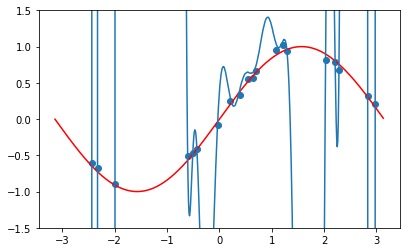

In [8]:
# カーネル回帰
def kernel_predict(X, x, alpha, beta):
    Y = 0
    for i in range(len(X)):
        Y += alpha[i] * kernel(X[i], x, beta)
    return Y

# 回帰によって結果を予測        
X_axis = np.arange(-3.14, 3.14, 0.01)#0.01刻みで-3.14から3.14までの値を格納
Y_predict = np.zeros(len(X_axis))#ゼロで　Y_predictを初期化
for i in range(len(X_axis)):
    Y_predict[i] = kernel_predict(X, X_axis[i], alpha, beta)

# 結果を描画
plt.figure(figsize=(6.472, 4))

## 観測データ
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
## 真の関数
plt.plot(X_axis, np.sin(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict)

plt.ylim((-1.5, 1.5))
plt.show()

## 正則化して、重みαがあまりにも大きな値にならないようにする

$${\begin{align}
R({\bf \alpha})
&=({\bf y}- K {\bf \alpha})^{\mathrm{T}}({\bf y}- K {\bf \alpha}) + \lambda {\bf \alpha}^{\mathrm{T}} K {\bf \alpha}
\end{align}
}$$

$${\bf \alpha}^{\mathrm{T}} K {\bf \alpha}は、学習器の予測値に、重み\alphaを掛けたもの$$
λの値は、任意に決められるが、λの値が大きいほどαの値が小さくなるように学習しなくてはならない

$${{\bf \alpha} = (K+\lambda I_N)^{-1}{\bf y}
}$$

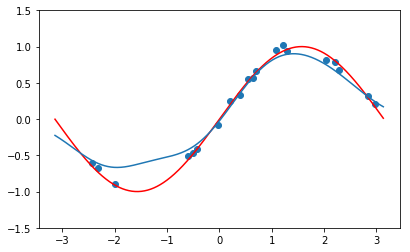

In [10]:
# 正則化項の係数
lam = 0.5
alpha_r = np.linalg.inv(K + lam * np.eye(K.shape[0])).dot(Y)

# 回帰によって結果を予測
Y_predict_r = np.zeros(len(X_axis))
for i in range(len(X_axis)):
    Y_predict_r[i] = kernel_predict(X, X_axis[i], alpha_r, beta)

# 結果を描画
plt.figure(figsize=(6.472, 4))

## 観測データ
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
## 真の関数
plt.plot(X_axis, np.sin(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict_r)

plt.ylim((-1.5, 1.5))
plt.show()

## 参考文献
- 線形な手法とカーネル法（1. 回帰分析）(Qiita) https://qiita.com/wsuzume/items/09a59036c8944fd563ff　参照日：2018/9/23
- 線形回帰の Normal Equation（正規方程式）について(Qiita) https://qiita.com/antimon2/items/ac1ebaed75ad58406b94　参照日：2018/9/25
- 様々な種類の最小二乗問題の最適解 (Qiita)https://qiita.com/Bikkle/items/df94c641c9e13a094849　参照日：2018/10/13
- 正則化最小二乗法 (regularized least squares method) http://www.sanko-shoko.net/note.php?id=z7xb 参照日：2018/10/13
